In [53]:
import pandas as pd
import numpy as np
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting
from pypfopt import CLA
from pypfopt import hierarchical_portfolio
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

## Asset selection from market index SENSEX

### Get all the stock tickers of Sensex

In [54]:
ticker = ["TCS.BO","LT.BO","INFY.BO","AXISBANK.BO","HINDUNILVR.BO","HCLTECH.BO","WIPRO.BO","ICICIBANK.BO","BAJAJFINSV.BO","RELIANCE.BO","TECHM.BO","BAJFINANCE.BO","M&M.BO","MARUTI.BO","ULTRACEMCO.BO","POWERGRID.BO","SBIN.BO","BHARTIARTL.BO","TITAN.BO","INDUSINDBK.BO","ITC.BO","HDFCBANK.BO","TATASTEEL.BO","TATAMOTORS.BO","NTPC.BO","ASIANPAINT.BO","KOTAKBANK.BO","JSWSTEEL.BO","SUNPHARMA.BO","NESTLEIND.BO"]
prices=pd.DataFrame()

### Extract data for last 1 year for all the stock tickers

In [55]:
end_date=dt.datetime(2024, 1, 10)
years=1
start_date = end_date - dt.timedelta(days=365*years)
for i in ticker:
    prices_data=yf.download(i,start_date,end_date)
    prices[i]=prices_data['Adj Close']
print(prices)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

### Calculate daily returns

In [56]:
daily_return=prices.pct_change().dropna()
print(daily_return)
print(daily_return.columns)

              TCS.BO     LT.BO   INFY.BO  AXISBANK.BO  HINDUNILVR.BO  \
Date                                                                   
2023-01-11  0.012978  0.008735  0.000714    -0.001996      -0.018856   
2023-01-12  0.001727  0.016636  0.006184    -0.015421      -0.001947   
2023-01-13  0.011875 -0.002986  0.015501    -0.001229       0.012728   
2023-01-16  0.010669 -0.007220  0.014466    -0.022586      -0.009383   
2023-01-17  0.013331  0.035053  0.009507     0.005038       0.026664   
...              ...       ...       ...          ...            ...   
2024-01-03 -0.024238  0.000567 -0.029154     0.006131      -0.003138   
2024-01-04 -0.006650  0.005260  0.014763     0.022282      -0.005028   
2024-01-05  0.019294  0.016160  0.013689     0.011610       0.010840   
2024-01-08 -0.016066 -0.004210 -0.006491    -0.013367      -0.015819   
2024-01-09  0.003385  0.015456  0.004071    -0.005749       0.000872   

            HCLTECH.BO  WIPRO.BO  ICICIBANK.BO  BAJAJFINSV.BO  

### Import risk-free rate data for last 1 year

In [57]:
risk_free_rate_data = pd.read_csv('C:\\term 6\project work\phase 2\India 10-Year Bond Yield Historical Data(2).csv', index_col=0)
print(risk_free_rate_data)
risk_free_rate_data.reset_index(inplace=True)
print(risk_free_rate_data.columns)

            Price
Date             
10-01-2023  7.313
11-01-2023  7.291
12-01-2023  7.286
13-01-2023  7.299
16-01-2023  7.327
...           ...
04-01-2024  7.220
05-01-2024  7.235
08-01-2024  7.203
09-01-2024  7.189
10-01-2024  7.187

[245 rows x 1 columns]
Index(['Date', 'Price'], dtype='object')


In [58]:
risk_free_rate_data['Date'] = pd.to_datetime(risk_free_rate_data['Date'], format='%d-%m-%Y')
risk_free_rate_data.set_index('Date', inplace=True)
print(risk_free_rate_data)


            Price
Date             
2023-01-10  7.313
2023-01-11  7.291
2023-01-12  7.286
2023-01-13  7.299
2023-01-16  7.327
...           ...
2024-01-04  7.220
2024-01-05  7.235
2024-01-08  7.203
2024-01-09  7.189
2024-01-10  7.187

[245 rows x 1 columns]


### Calculate annual risk-free rate

In [59]:
annual_rf=risk_free_rate_data['Price'].mean()/100
print(f"The annual risk free rate is: {annual_rf}")

The annual risk free rate is: 0.07212832653061226


### Calculate annualized return for all the stocks

In [60]:
annual_returns = (1 + daily_return).prod()**(252/daily_return.count()) - 1
annual_returns

TCS.BO           0.179919
LT.BO            0.773953
INFY.BO          0.074270
AXISBANK.BO      0.189721
HINDUNILVR.BO   -0.009295
HCLTECH.BO       0.468579
WIPRO.BO         0.165062
ICICIBANK.BO     0.162688
BAJAJFINSV.BO    0.210495
RELIANCE.BO      0.013615
TECHM.BO         0.307491
BAJFINANCE.BO    0.348013
M&M.BO           0.268712
MARUTI.BO        0.230696
ULTRACEMCO.BO    0.485912
POWERGRID.BO     0.726296
SBIN.BO          0.078321
BHARTIARTL.BO    0.388526
TITAN.BO         0.555118
INDUSINDBK.BO    0.375646
ITC.BO           0.437614
HDFCBANK.BO      0.070042
TATASTEEL.BO     0.177952
TATAMOTORS.BO    1.061818
NTPC.BO          1.139382
ASIANPAINT.BO    0.124222
KOTAKBANK.BO     0.019084
JSWSTEEL.BO      0.117749
SUNPHARMA.BO     0.352326
NESTLEIND.BO     0.498166
dtype: float64

### Calculate annualized volatility for all the stocks

In [61]:
annual_volatility = daily_return.std() *np.sqrt(252)
annual_volatility

TCS.BO           0.187429
LT.BO            0.194437
INFY.BO          0.245063
AXISBANK.BO      0.188996
HINDUNILVR.BO    0.150280
HCLTECH.BO       0.206519
WIPRO.BO         0.202992
ICICIBANK.BO     0.160738
BAJAJFINSV.BO    0.223840
RELIANCE.BO      0.193654
TECHM.BO         0.257124
BAJFINANCE.BO    0.235120
M&M.BO           0.237054
MARUTI.BO        0.153871
ULTRACEMCO.BO    0.190790
POWERGRID.BO     0.206509
SBIN.BO          0.220654
BHARTIARTL.BO    0.175358
TITAN.BO         0.179080
INDUSINDBK.BO    0.253926
ITC.BO           0.177386
HDFCBANK.BO      0.171161
TATASTEEL.BO     0.212843
TATAMOTORS.BO    0.237558
NTPC.BO          0.219128
ASIANPAINT.BO    0.174688
KOTAKBANK.BO     0.174423
JSWSTEEL.BO      0.203511
SUNPHARMA.BO     0.158855
NESTLEIND.BO     0.185623
dtype: float64

### Finding Sharpe ratio for all the stocks and select top 5 among them with maximum sharpe ratio

In [62]:
sharpe_ratios = (annual_returns - annual_rf) / annual_volatility
sharpe_ratios


TCS.BO           0.575099
LT.BO            3.609516
INFY.BO          0.008740
AXISBANK.BO      0.622197
HINDUNILVR.BO   -0.541812
HCLTECH.BO       1.919677
WIPRO.BO         0.457819
ICICIBANK.BO     0.563400
BAJAJFINSV.BO    0.618152
RELIANCE.BO     -0.302157
TECHM.BO         0.915366
BAJFINANCE.BO    1.173380
M&M.BO           0.829276
MARUTI.BO        1.030524
ULTRACEMCO.BO    2.168792
POWERGRID.BO     3.167743
SBIN.BO          0.028067
BHARTIARTL.BO    1.804303
TITAN.BO         2.697066
INDUSINDBK.BO    1.195302
ITC.BO           2.060403
HDFCBANK.BO     -0.012189
TATASTEEL.BO     0.497190
TATAMOTORS.BO    4.166099
NTPC.BO          4.870468
ASIANPAINT.BO    0.298212
KOTAKBANK.BO    -0.304113
JSWSTEEL.BO      0.224166
SUNPHARMA.BO     1.763864
NESTLEIND.BO     2.295175
dtype: float64

In [63]:
print(sharpe_ratios.nlargest())

NTPC.BO          4.870468
TATAMOTORS.BO    4.166099
LT.BO            3.609516
POWERGRID.BO     3.167743
TITAN.BO         2.697066
dtype: float64


## 5- Asset Portfolio Optimization

### Extract market price data for these 5 stocks from the original data frame 

In [64]:
top_5_stocks=['NTPC.BO', 'TATAMOTORS.BO', 'LT.BO', 'POWERGRID.BO', 'TITAN.BO']
top_5_stocks_prices=prices[top_5_stocks]
top_5_stocks_prices

,NTPC.BO,TATAMOTORS.BO,LT.BO,POWERGRID.BO,TITAN.BO
Date,,,,,
2023-01-10,159.769089,413.049988,2106.449951,147.180115,2467.300049
2023-01-11,158.008118,418.049988,2124.850098,147.458054,2437.600098
2023-01-12,157.865356,412.200012,2160.199951,148.430923,2445.649902
2023-01-13,159.721481,411.450012,2153.750000,148.639389,2417.649902
2023-01-16,157.865356,413.149994,2138.199951,149.855469,2405.800049
...,...,...,...,...,...
2024-01-03,306.250000,781.349976,3441.050049,236.949997,3692.600098
2024-01-04,317.100006,795.650024,3459.149902,241.449997,3721.250000
2024-01-05,315.000000,790.549988,3515.050049,241.300003,3710.050049


### Plotting market price movement for these stocks

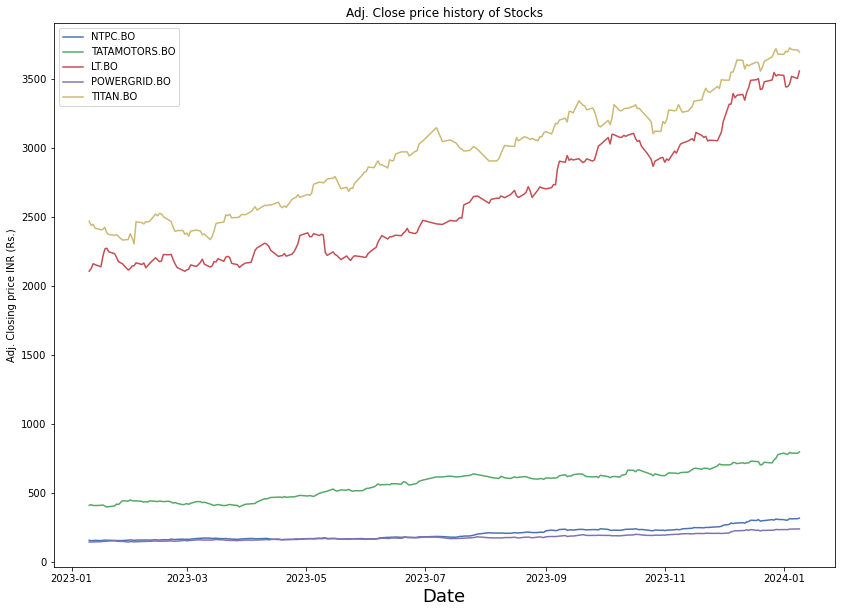

In [65]:
my_stocks=top_5_stocks_prices
plt.figure(figsize=(14,10))
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c],label=c)
plt.title("Adj. Close price history of Stocks")
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj. Closing price INR (Rs.)')
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

### Calculate daily returns

In [66]:
daily_return_top_5_stocks=top_5_stocks_prices.pct_change().dropna()
daily_return_top_5_stocks

,NTPC.BO,TATAMOTORS.BO,LT.BO,POWERGRID.BO,TITAN.BO
Date,,,,,
2023-01-11,-0.011022,0.012105,0.008735,0.001888,-0.012037
2023-01-12,-0.000904,-0.013993,0.016636,0.006598,0.003302
2023-01-13,0.011758,-0.001820,-0.002986,0.001404,-0.011449
2023-01-16,-0.011621,0.004132,-0.007220,0.008181,-0.004901
2023-01-17,0.010552,0.005083,0.035053,0.012752,0.001122
...,...,...,...,...,...
2024-01-03,0.000654,-0.004079,0.000567,-0.003365,-0.001136
2024-01-04,0.035429,0.018302,0.005260,0.018991,0.007759
2024-01-05,-0.006623,-0.006410,0.016160,-0.000621,-0.003010


### Calculate annualized covariance matrix for these 5 stocks

In [67]:
cov_matrix_annual=daily_return_top_5_stocks.cov()*252
cov_matrix_annual

,NTPC.BO,TATAMOTORS.BO,LT.BO,POWERGRID.BO,TITAN.BO
NTPC.BO,0.048017,0.011828,0.007625,0.020198,0.008898
TATAMOTORS.BO,0.011828,0.056434,0.007162,0.010835,0.009995
LT.BO,0.007625,0.007162,0.037806,0.008537,0.006166
POWERGRID.BO,0.020198,0.010835,0.008537,0.042646,0.008506
TITAN.BO,0.008898,0.009995,0.006166,0.008506,0.032070


### Taking a equal weighted portfolio

In [68]:
weights=np.array([1/len(top_5_stocks)]*len(top_5_stocks))
print(weights)

[0.2 0.2 0.2 0.2 0.2]


In [69]:
port_variance=np.dot(weights.T,np.dot(cov_matrix_annual,weights))
port_volatility=np.sqrt(port_variance)

### Portfolio performance for an equally weighted portfolio

In [70]:
port_return=np.sum(daily_return_top_5_stocks.mean()*weights)*252
print(f"Expected annual return(equally weighted portfolio): {port_return*100:.1f}%")
print(f"Annual volatility(equally weighted portfolio): {port_volatility*100:.1f}%")
sr = (port_return - annual_rf) / port_volatility
print(f"Sharpe Ratio: {sr:.2f}")

Expected annual return(equally weighted portfolio): 63.1%
Annual volatility(equally weighted portfolio): 12.9%
Sharpe Ratio: 4.33


### Calculating expected returns and covariance matrix for the chosen assets

In [71]:
ret=expected_returns.mean_historical_return(top_5_stocks_prices)
risk=risk_models.sample_cov(top_5_stocks_prices)
ret

NTPC.BO          1.139382
TATAMOTORS.BO    1.061818
LT.BO            0.773953
POWERGRID.BO     0.726296
TITAN.BO         0.555118
dtype: float64

### Optimizing the portfolio on the basis of maximum sharpe ratio

In [72]:
top_5_stocks_prices_opt=EfficientFrontier(ret,risk)
raw_weights=top_5_stocks_prices_opt.max_sharpe(risk_free_rate=annual_rf)
cleaned_weights = top_5_stocks_prices_opt.clean_weights()
top_5_stocks_prices_opt.portfolio_performance(verbose=True)

Expected annual return: 95.4%
Annual volatility: 13.9%
Sharpe Ratio: 6.33


c:\Users\manda\anaconda3\lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


(0.9537182180559455, 0.1391823608553661, 6.334063354777072)

### Weights assigned to each asset for the optimized portfolio

In [73]:
for key, value in cleaned_weights.items():
    print(f"{key}: {value:.2f}")

NTPC.BO: 0.35
TATAMOTORS.BO: 0.25
LT.BO: 0.27
POWERGRID.BO: 0.03
TITAN.BO: 0.09


### Plotting the efficient frontier

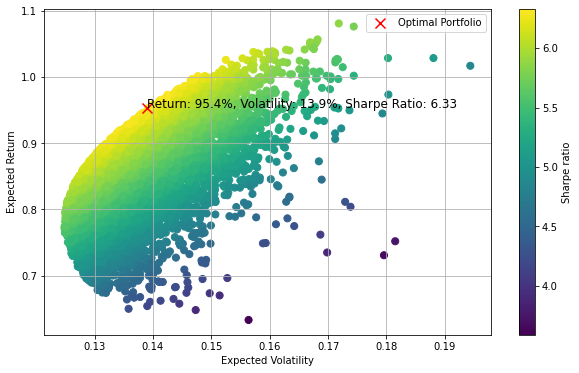

In [75]:
num_portfolios = 10000

# Risk free rate
risk_free_rate = annual_rf  

# Initialize arrays to store the portfolio weights, returns and volatilities
weights_arr = np.zeros((num_portfolios, len(ret)))
returns_arr = np.zeros(num_portfolios)
volatility_arr = np.zeros(num_portfolios)

for i in range(num_portfolios):
    # Generate random portfolio weights that sum to 1
    weights = np.random.random(len(ret))
    weights /= np.sum(weights)
    weights_arr[i, :] = weights

    # Calculate the portfolio return and volatility
    returns_arr[i] = np.sum(ret * weights)
    volatility_arr[i] = np.sqrt(np.dot(weights.T, np.dot(risk, weights)))

# Calculate the Sharpe Ratio for each portfolio
sharpe_ratio_arr = (returns_arr - risk_free_rate) / volatility_arr

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(volatility_arr, returns_arr, c=sharpe_ratio_arr, marker='o', s=50)
plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe ratio')

# Add a marker for the optimal portfolio
optimal_volatility = 0.139 
optimal_return = 0.954
optimal_sharpe = 6.33
plt.scatter(optimal_volatility, optimal_return, marker='x', color='r', s=100, label='Optimal Portfolio')
plt.text(optimal_volatility, optimal_return, 'Return: 95.4%, Volatility: 13.9%, Sharpe Ratio: 6.33', fontsize=12)


plt.legend()

plt.show()